In [1]:
import torch 
from torch import nn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles 
import pandas as pd
import matplotlib.pyplot as plt

When importing <a href='https://pytorch.org' >`torch`</a> module in <a href='https://www.python.org/doc/essays/blurb/'>`PyThon`</a> programming language, we have to ensure that this deep learning library have access to an accelerator . In other words, we must define a <a href='https://buseyaren.medium.com/what-is-a-gpu-are-they-needed-for-deep-learning-94dd4aeb45f6'>GPU</a> in order for our model, to be very efficient when performing calculations . Since we used a Macbook with their <a href='https://redaktor.co/tech/apple-m1-vs-m2-vs-m3-comparison/'>M</a> chips with integrated GPU, then our device agnostic code will be slightly different from what we can find on the <a href='https://pytorch.org/docs/stable/notes/cuda.html'>PyTorch GPU Documentation</a> . 

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device 

'mps'

So, we have an access to an acceleretor . Now, we can start our simple <a href='https://pytorch.org'>PyTorch</a> classification project. Every PyTorch Project has 6 majors steps as we can see them in the following image: 

<img src="mlprocess.png" alt="Transposition of a vector" title="Vector transposition" width="700">

### 1-Get Data Ready

In our case, we will simply generate synthetic data with popular <a href='https://scikit-learn.org/1.5/datasets/toy_dataset.html'>sklearn datasets</a> module . Hence, by default, we will not need intensive data preprocessing since our data is already in numerical form and also ready to be put on machine learning algorithm. To generate our data, we will use popular <a href='https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_circles.html'>make_circles</a> function.

- **1.1 Generate and Preprocess the data**

In [3]:
n_samples = 1000

X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
len(X), len(y)

(1000, 1000)

Then, we create a <a href='https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/pandas-dataframes.html#:~:text=A%20dataframe%20is%20a%20data,a%20database%20or%20Excel%20spreadsheet'>Pandas DataFrame</a> to better visualize our generated data.

In [4]:
circles = pd.DataFrame(data={"X1":X[:,0],
                            "X2":X[:,1],
                            "label":y})
circles # create a DataFrame to better visualize the synthetic data 

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


- **1.2 Visualize the Data**

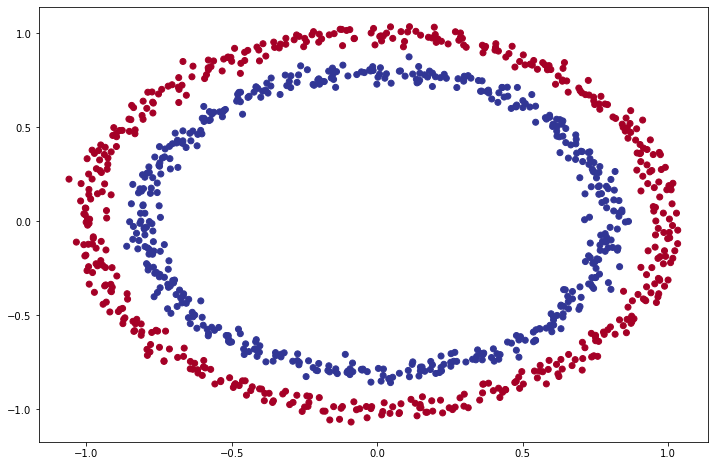

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)
plt.show()

- **1.3 Split the Data into train and test sets**

In every machine learning project, we have to split our data into train and test sets .

- The train dataset is to fit the model 
- The test dataset is to evaluate the model

To do that, we will use the famous sklearn <a href='https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html'>train_test_split</a> function.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

- **1.4 Turn The Data Into Tensors**

In [7]:
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [8]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

- **1.5 Put all the data into our device for GPU computation**

In [9]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

### 2. Build or Pick a Pretrained Model

Since we're dealing with classification problem, then , we will create a classification model in Pytorch from scratch . 

#### 2.1 Create a PyTorch model

In [10]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [11]:
torch.manual_seed(42)
model_0 = CircleModelV0()
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

- **2.1-bis Create the same model by using <a href='https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html'>nn.Sequential</a>** . Instead of creating a class as we done previously, we will instead, use sequential layer . It will be equivalent .

In [12]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [13]:
torch.manual_seed(42)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

#### 2.2 Send the model to GPU with device agnostic code 

In [14]:
model_0 = model_0.to(device)

#### 2.3 Let's predict with our unstrained model

In [15]:
model_0.eval()
with torch.inference_mode():
    # Make predictions with the model
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='mps:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0')


We see that instead of output label like `0` or `1`, our model outputs some real numbers . We know that in a classification problem, we want to ouptut some labels and not some real numbers . So, we have to find some way to convert real numbers to labels. But, before doing this, let's define a loss function and and optimizer 

**2.4 Define loss and optimizer functions**

In [16]:
# Define the Loss
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

- **Define an accuracy function for our predictions**

In [17]:
# Define accuracy metric for classification problems
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc 

#### 2.5 Going from logits -> Prediction Probabilities -> Prediction labels

Our model, via its forward method, output what we called <a href='https://en.wikipedia.org/wiki/Logit'>Logit</a>. So, we will see with a simple example, how we can convert some logits to some predicted labels

In [18]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='mps:0')

Then, after computing the logits which are at this stage real numbers, then, we will pass them throught an activation function called <a href='https://en.wikipedia.org/wiki/Sigmoid_function'>sigmoid</a> to ouput predicted probabilities . We can easily do this through `torch` `sigmoid` function.

In [19]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='mps:0')

Then, after obtaining our predicted probabilities, then, we can easily output model labels via the following rounding rule : 

- If `y_pred_probs` >= 0.5, `y=1` (class 1)
- If `y_pred_probs` < 0.5, `y=0` (class 0)

In [20]:
y_pred_labels = torch.round(y_pred_probs)
y_pred_labels.squeeze(dim=1)

tensor([0., 0., 1., 0., 1.], device='mps:0')

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='mps:0')

### 3. Fit the model to the data and make a prediction

In [22]:
torch.manual_seed(42)
epoch_count = []
train_loss_count = []
test_loss_count = []
epochs = 100
for epoch in range(epochs):
    
    ### Set the model into train mode 
    model_0.train()
    
    # 1. Forward Pass 
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # with nn.BCELoss
    loss = loss_fn(y_logits, y_train)  # with nn.BCEWithLogitsLoss
    acc = accuracy_fn(y_preds, y_train)
    
    # 3. Optimizer zero_grad
    optimizer.zero_grad()
    
    # 4. Loss Backward 
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Set the model in test mode 
    model_0.eval()
    
    with torch.inference_mode():
        
        # 1. Forward Pass 
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate the loss
        # test_loss = loss_fn(torch.sigmoid(test_logits), y_test) with nn.BCELoss
        test_loss = loss_fn(test_logits, y_test) # with nn.BCEWithLogitsLoss
        test_acc = accuracy_fn(test_preds, y_test)
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_count.append(loss.cpu().detach().numpy())
        test_loss_count.append(test_loss.cpu().detach().numpy())
        print(f"Epoch:{epoch} | Train Loss:{loss}, Train Acc:{acc}% | Test Loss:{test_loss}, Test Acc:{test_acc}%")

Epoch:0 | Train Loss:0.6979604363441467, Train Acc:51.87500000000001% | Test Loss:0.6943961381912231, Test Acc:57.99999999999999%
Epoch:10 | Train Loss:0.6958984136581421, Train Acc:51.24999999999999% | Test Loss:0.6930526494979858, Test Acc:53.0%
Epoch:20 | Train Loss:0.6949014663696289, Train Acc:51.625% | Test Loss:0.692543625831604, Test Acc:49.5%
Epoch:30 | Train Loss:0.6943498253822327, Train Acc:51.125% | Test Loss:0.6923598051071167, Test Acc:49.5%
Epoch:40 | Train Loss:0.6940091252326965, Train Acc:50.875% | Test Loss:0.6923155784606934, Test Acc:51.0%
Epoch:50 | Train Loss:0.6937821507453918, Train Acc:50.24999999999999% | Test Loss:0.692336916923523, Test Acc:50.0%
Epoch:60 | Train Loss:0.6936231255531311, Train Acc:50.0% | Test Loss:0.6923913359642029, Test Acc:51.5%
Epoch:70 | Train Loss:0.6935078501701355, Train Acc:50.24999999999999% | Test Loss:0.6924623847007751, Test Acc:51.0%
Epoch:80 | Train Loss:0.6934223175048828, Train Acc:49.875% | Test Loss:0.6925414800643921, 

### 4. Evaluate the model

#### 4.1 Evaluate the model with Train & Test Loss Plot

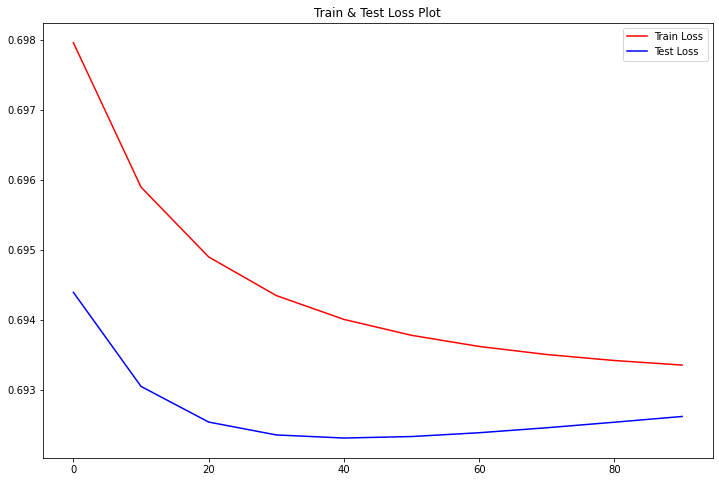

In [23]:
plt.figure(figsize=(12,8))
plt.plot(epoch_count, train_loss_count, c='red', label='Train Loss')
plt.plot(epoch_count, test_loss_count, c='blue', label='Test Loss')
plt.title('Train & Test Loss Plot')
plt.legend()
plt.show()

 When evaluate our model, we see that it learns anything . Accuracy function on our data is very poor and the loss doesn't reduce after some training epochs . So, we will visualize our classification boundaries and try to improve the performance of our classification neural networks.

#### 4.2 Evaluate our classification model visually

In [24]:
import requests
from pathlib import Path 

if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skipping downloading')
else:
    print("Downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

helper_functions.py already exists, skipping downloading


In [25]:
from helper_functions import plot_decision_boundary, plot_predictions

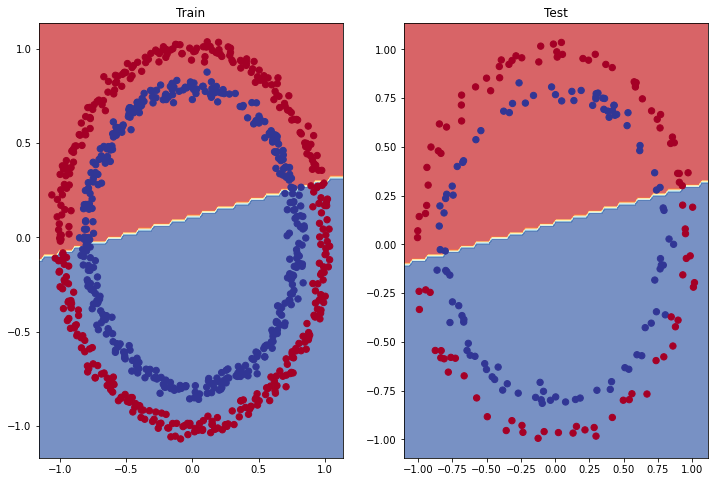

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_0, X_train, y_train)
plt.title('Train')
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_test)
plt.title('Test')
plt.show()

When visualize our model, we see that we are trying to separate a circular dataset with linear or straight line which is quite impossible . So, our model doesn't learn anything . In machine learning, this is what we called <a href="https://www.ibm.com/topics/underfitting#:~:text=Underfitting%20occurs%20when%20a%20model,poor%20performance%20of%20the%20model">underfitting</a> . We will try to improve our model's performance.

### 5. Improve our model

To improve a model in deep learning, we must tune its hyperparameters . <a href="https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac">Hyperparameters</a> are parameters that, us, as data scientists can directly modify in our model in opposite of **parameters** that the model learns automatically . So, to improve our deep learning model, we can for example : 

- add more layers 

- add more hidden units 

- fitting for longer 

- changing the activate function 

- change the learning rate 

- change the loss function 

- use transfer learning

Here is an image which best explain how we can improve a neural network performances :

<img src="IDM.png" alt="Transposition of a vector" title="Vector transposition" width="700">

#### 5.1 Create a PyTorch model to try to improve our model by adding more layers and more hidden units

In [27]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [28]:
torch.manual_seed(42)
model_1 = CircleModelV1()
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

#### 5.2 Send the model to GPU with device agnostic code

In [29]:
model_1 = model_1.to(device)

#### 5.3 Loss functions and Optimizers

In [30]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)

#### 5.4 Fit the model to the data

In [31]:
torch.manual_seed(42)
epoch_count = []
train_loss_count = []
test_loss_count = []
epochs = 1000

for epoch in range(epochs):
    
    ### Set the model to train mode 
    model_1.train()
    
    # 1. Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)
    
    # 3. Optimizer zero_grad
    optimizer.zero_grad()
    
    # 4. Loss Backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    
    ### Testing 
    model_1.eval()
    
    with torch.inference_mode():
        
        # 1. Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_count.append(loss.cpu().detach().numpy())
        test_loss_count.append(test_loss.cpu().detach().numpy())
        print(f"Epoch:{epoch} | Train Loss:{loss}, Train Acc:{acc}% | Test Loss:{test_loss}, Test Acc:{test_acc}%")

Epoch:0 | Train Loss:0.6939550042152405, Train Acc:50.875% | Test Loss:0.6926106214523315, Test Acc:51.0%
Epoch:100 | Train Loss:0.6936901807785034, Train Acc:50.24999999999999% | Test Loss:0.692693293094635, Test Acc:50.0%
Epoch:200 | Train Loss:0.6935145258903503, Train Acc:50.125% | Test Loss:0.6928169131278992, Test Acc:49.5%
Epoch:300 | Train Loss:0.6933882236480713, Train Acc:50.5% | Test Loss:0.692952036857605, Test Acc:49.0%
Epoch:400 | Train Loss:0.6932938098907471, Train Acc:50.375% | Test Loss:0.6930880546569824, Test Acc:48.5%
Epoch:500 | Train Loss:0.6932222843170166, Train Acc:49.875% | Test Loss:0.6932206749916077, Test Acc:49.5%
Epoch:600 | Train Loss:0.6931675672531128, Train Acc:49.5% | Test Loss:0.6933472752571106, Test Acc:53.0%
Epoch:700 | Train Loss:0.6931255459785461, Train Acc:49.375% | Test Loss:0.6934669613838196, Test Acc:50.5%
Epoch:800 | Train Loss:0.6930931806564331, Train Acc:50.0% | Test Loss:0.6935786008834839, Test Acc:51.0%
Epoch:900 | Train Loss:0.69

#### 5.5 Evaluate our model visually

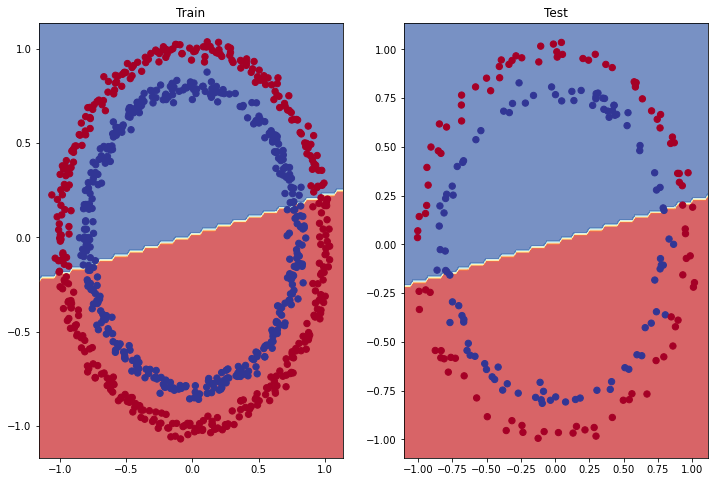

In [32]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X_train, y_train)
plt.title('Train')
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X_test, y_test)
plt.title('Test')
plt.show()

#### 5.6 Evaluate our model with Train and Test Loss plot

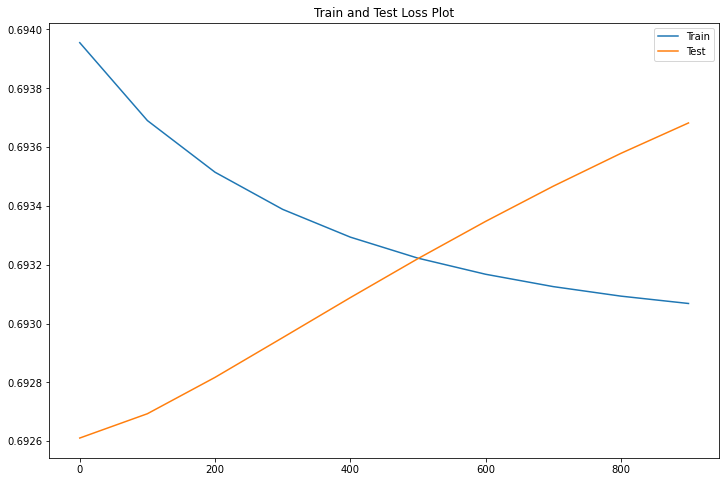

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(epoch_count, train_loss_count, label='Train')
plt.plot(epoch_count, test_loss_count, label='Test')
plt.legend()
plt.title('Train and Test Loss Plot')
plt.show()

By analysing our train and test loss plots and our plot decision boundary, we see that our model underfits the data again whereas we :

- add more layers 

- add more hidden units 

- we fit for longer 

Hence, `model_1` seems to learn anything again . But is that really true ? Let's check this really by trying to fit our `model_1` to linear data to see if either our model learns anything or either it learns only straights lines .

#### 5.5 Preparing data to see if our `model_1` can really learn something --> ( straight line in our case )

To do so, we will use the data generated for our PyTorch regression task and that you can find on my github <a href="https://github.com/Ncxs99/Stastitical-Learning-and-Trading/blob/master/Statistical%20Learning/Deep%20Learning/Regression/PyTorch/01_PyTorch_Workflow.ipynb">Ncxs99</a>.

#### 5.5.1 Get the Data Ready

- **Generate and Preprocess the data**

In [34]:
# Create some data
weight = 0.7
bias = 0.3 
start = 0
end = 1
step = 0.01

# Create data 
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias 

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

- **Split the data into train and test splits**

In [35]:
# Create train and test split 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regresion = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regresion)

(80, 20, 80, 20)

- **Visualize the data**

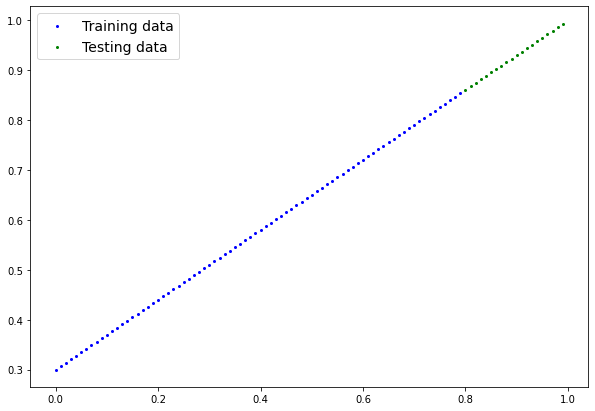

In [36]:
# Visualize the data 
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regresion)

- **The third step is to convert our data into tensors but we already do that because all our datas have been generated by PyTorch.**

- **Send our tensors in GPU with device agnostic code**

In [37]:
X_train_regression = X_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_train_regression = y_train_regression.to(device)
y_test_regresion = y_test_regresion.to(device)

#### 5.5.2 Build or Pick a Pretrained Model

- **Create a PyTorch model**

In [38]:
# Use nn.Sequential ---> to reproduce our code in an efficient manner 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

- **Send the model to GPU with device agnostic code**

In [39]:
model_2 = model_2.to(device)

In [40]:
torch.manual_seed(42)
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]], device='mps:0')),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549], device='mps:0')),
             ('1.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
           

- **Define Loss and Optimizer functions**

In [41]:
# Loss and Optimizer 
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

#### 5.5.3 Fit the model to the data 

In [42]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    
    model_2.train()
    
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_2.eval()
    
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regresion)
    
    if epoch % 100 == 0 :    
        print(f"Epoch:{epoch} | Train Loss:{loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:0.7598585486412048 | Test Loss:0.9110288619995117
Epoch:100 | Train Loss:0.02857951633632183 | Test Loss:0.0008127153269015253
Epoch:200 | Train Loss:0.025325385853648186 | Test Loss:0.002091956092044711
Epoch:300 | Train Loss:0.021374734118580818 | Test Loss:0.0030507862102240324
Epoch:400 | Train Loss:0.019644953310489655 | Test Loss:0.0034076811280101538
Epoch:500 | Train Loss:0.01940228044986725 | Test Loss:0.00387246604077518
Epoch:600 | Train Loss:0.019032541662454605 | Test Loss:0.0037891329266130924
Epoch:700 | Train Loss:0.01878306083381176 | Test Loss:0.003813451621681452
Epoch:800 | Train Loss:0.018397534266114235 | Test Loss:0.0032873451709747314
Epoch:900 | Train Loss:0.017980368807911873 | Test Loss:0.003603726625442505


#### 5.5.4 Evaluate the model

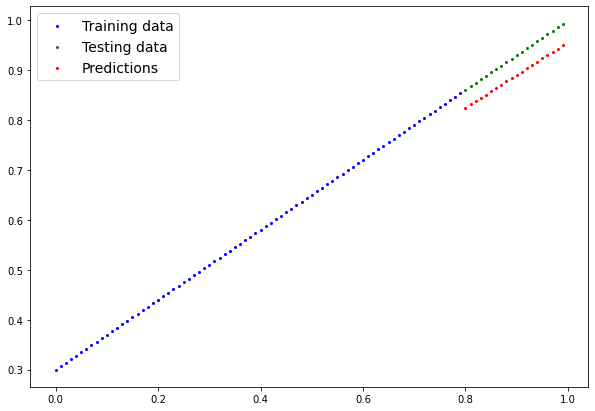

In [43]:
# Do predictiosn with our model_2
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                train_labels=y_train_regression.cpu(),
                test_data=X_test_regression.cpu(),
                test_labels=y_test_regresion.cpu(),
                predictions=y_preds.cpu())

We see that our model learns something but it only learns linear model . But we see that our data is circular, meaning that we cannot use a straight line to separate our classes from our classification problems . So, we have to use some non linear line to well separate our data. Hence, we must find a way to tell to our deep learning model to take into account the non linearity . In fact, our deep learning model must be capable to find non linear patterns in numbers . Let's see how we can achieve it with PyTorch.

- **Create a Non Linear PyTorch neural networks code**

In [44]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [45]:
torch.manual_seed(42)
model_3 = CircleModelV3()
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

- **Send the model to GPU with device agnostic code**

In [46]:
model_3 = model_3.to(device)

- **Define the loss and optimizers functions**

In [47]:
# loss function 
loss_fn = nn.BCEWithLogitsLoss()

# optimizer 
optimizer = torch.optim.Adam(params=model_3.parameters(),
                           lr=0.1)

- **Fit the model to the data**

In [48]:
torch.manual_seed(42)
epoch_count = []
train_loss_count = []
test_loss_count = []
epochs = 1000

for epoch in range(epochs):
    
    ### Train mode 
    model_3.train()
    
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)
    
    # 3. Optimizer zero_grad
    optimizer.zero_grad()
    
    # 4. Loss Backward 
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Test mode 
    model_3.eval()
    
    with torch.inference_mode():
        
        # 1. Forward Pass 
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        
    if epoch % 100==0:
        epoch_count.append(epoch)
        train_loss_count.append(loss.cpu().detach().numpy())
        test_loss_count.append(test_loss.cpu().detach().numpy())
        print(f"Epoch:{epoch} | Train Loss:{loss}, Train Acc:{acc}% | Test Loss:{test_loss}, Test Acc:{test_acc}%")

Epoch:0 | Train Loss:0.6929462552070618, Train Acc:50.0% | Test Loss:0.6939401030540466, Test Acc:50.0%
Epoch:100 | Train Loss:0.001684073475189507, Train Acc:100.0% | Test Loss:0.007436033338308334, Test Acc:100.0%
Epoch:200 | Train Loss:0.000712765206117183, Train Acc:100.0% | Test Loss:0.005433628801256418, Test Acc:100.0%
Epoch:300 | Train Loss:0.00041173206409439445, Train Acc:100.0% | Test Loss:0.004930720664560795, Test Acc:100.0%
Epoch:400 | Train Loss:0.0002592829696368426, Train Acc:100.0% | Test Loss:0.0057304329238832, Test Acc:100.0%
Epoch:500 | Train Loss:0.00017639657016843557, Train Acc:100.0% | Test Loss:0.00516270287334919, Test Acc:100.0%
Epoch:600 | Train Loss:0.00013070505519863218, Train Acc:100.0% | Test Loss:0.005133756902068853, Test Acc:100.0%
Epoch:700 | Train Loss:0.00010179600212723017, Train Acc:100.0% | Test Loss:0.005340029485523701, Test Acc:100.0%
Epoch:800 | Train Loss:8.194522524718195e-05, Train Acc:100.0% | Test Loss:0.005600184202194214, Test Acc:

- **Evaluate our non linear model with Train and Test Loss Plot**

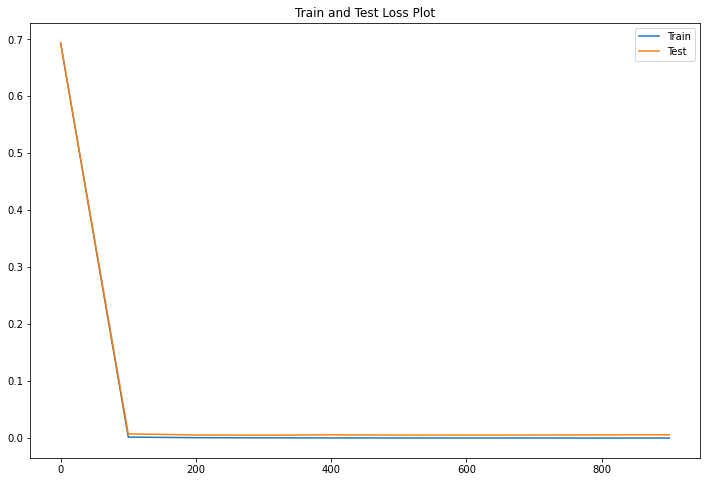

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(epoch_count, train_loss_count, label='Train')
plt.plot(epoch_count, test_loss_count, label='Test')
plt.legend()
plt.title('Train and Test Loss Plot')
plt.show()

- **Evaluate our model with our plot_boundaries_functions**

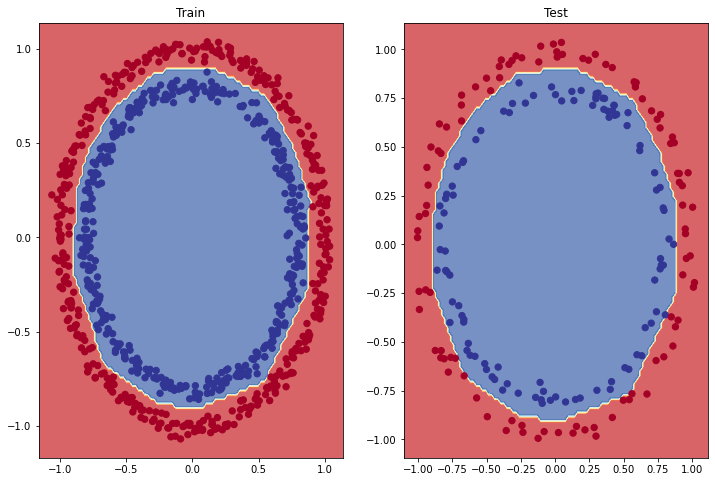

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title('Train')
plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_test, y_test)
plt.title('Test')
plt.show()

By evaluating our model, we clearly see that our non linear model `model_3` outperforms the previous ones for many reasons :

- We use the **non linearity** in our model, especially with the `nn.ReLU()` activation function. This is why deep learning models are quite powerful . They use linear regressions and activations functions to better learn patterns in numbers 


- We use <a href="https://www.geeksforgeeks.org/adam-optimizer/">`Adam Optimizer`</a> which is one of the most powerful and adaptive optimizer algorithm for deep learning tasks. This is the **to go** algorithm when you have to use a deep learning model . To better understand the mathematical and theoretical aspects of the `Adam Algorithm`, check these very expectional ressources : 

  - <a href="https://castle.princeton.edu/rlso/">Reinforcement Learning and Stochastic Optimization : A unified framework</a>, chapter 6, from <a href="https://scholar.google.com/citations?user=vDw80QEAAAAJ&hl=en">Warren B Powell</a> . 
  
  - <a href="https://pytorchstepbystep.com">Deep Learning With PyTorch Step By Step : A Beginner's Guide</a> which is one of the best deep learning ressources to learn PyTorch from scratch with an emphasize on how PyTorch code works, how deep learning concepts works and how to turn deep learning concepts in PyTorch code step by step
  

- We fit for longer 

- We add more hidden units 

- We add more layers 


But, to be very rigorous, the data we've just used is known to be a <a href="https://www.geeksforgeeks.org/toy-dataset-explanation-and-application/">Toy Dataset</a> . So, this dataset is so perfect , so clean , so easy to use so that we can achieve some very expectional results . In reality, raw datasets are much more complicated and even if we use all the same steps we used during this classification project , we could see that : 

- With non linearity, our model can still underfit

- The data is corrupted : Missing Datas and so on 

- The dimension of the data is too high : Thousands of dimensions -> impossible to visualize the data as we done 

- Adam optimizer is inefficient ( which is quite a rare event but still possible ) 

- Our classes `0` or `1` are imbalance 

- We have to do some regularization : Dropout and Kaiming Initialization for example 

- We have to normalize our data before feeding the neural networks with these numbers 